# 1. Data Extraction / Cleaning of Titanic dataset

In [27]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [28]:
df = pd.read_csv('train.csv')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#pclass(ticket class of passengers); 1 = upper class, 2 = middle class, 3 = lower class
#survived(whether passenger survived); 0=NO, 1=Yes
#SibSP(siblings / spouse on board)
#Parch(# of parents / children on board)
#cabin(cabin number)
#embarked(port where passenger boarded ship); C = Cherbourg, Q = Queenstown, S = Southampton

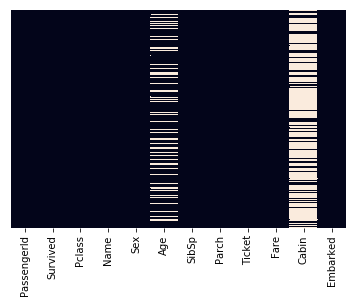

In [30]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
#missing data on Age and Cabin

In [31]:
df['Age'].dropna().mean()

29.69911764705882

In [32]:
df['Age'].fillna(value = 30, method = None, inplace = True)
#replaced missing age with the average passenger age

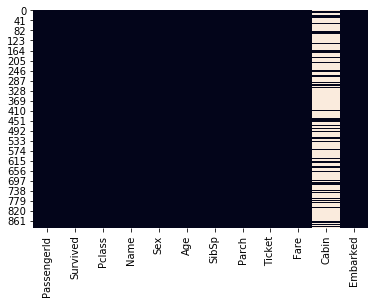

In [33]:
sns.heatmap(df.isnull(), cbar = False)

In [34]:
#too many missing Cabin data, column will be dropped from analysis

In [35]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 2. Preliminary landscape analysis of Titanic Dataset

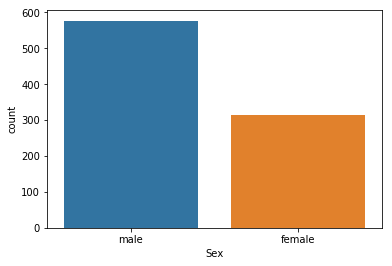

In [36]:
sns.countplot(x = 'Sex', data = df)
#2 times more males than females onboard

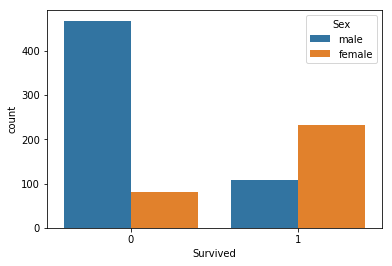

In [37]:
sns.countplot(x = 'Survived', data = df, hue = 'Sex')

# majority did not survive - majority that did not survive were male
# Of the survivors - 2 times more females than males

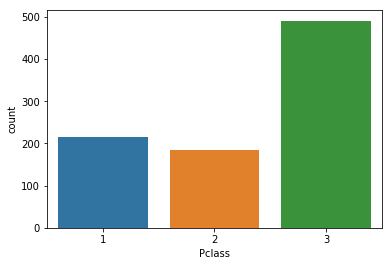

In [38]:
sns.countplot(x = 'Pclass', data = df)
# majority of passengers are in 3rd class 

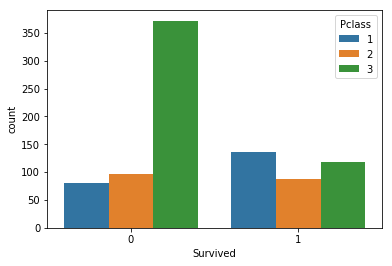

In [39]:
sns.countplot(x = 'Survived', data = df, hue = 'Pclass')
#of those that survived, more came from 1st class

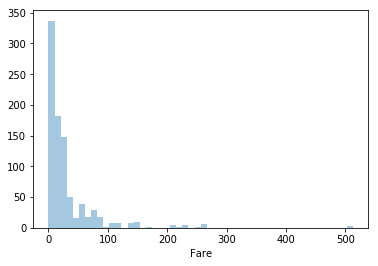

In [40]:
sns.distplot(df['Fare'], kde = False)

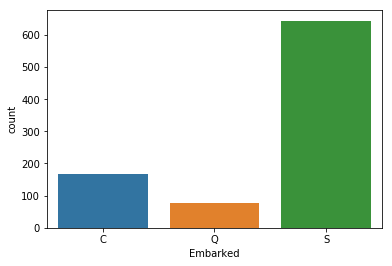

In [41]:
sns.countplot(x = 'Embarked', data = df, order = ['C', 'Q', 'S'])
# Majority of passengers boarded in Southampton

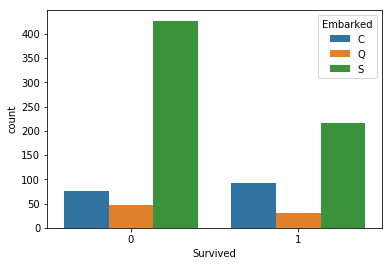

In [42]:
sns.countplot(x = 'Survived', data = df, hue = 'Embarked', hue_order = ['C', 'Q', 'S'])
# Of the survivors follows the proportion of passengers by place of embarkation

In [43]:
sns.countplot(x = 'Embarked', hue = 'Pclass', data = embark_survivors, order = ['C','Q','S'])
#Southampton's passengers are split evenly, but Cherboug has more 1st class passengers and Queenstown has more 3rd class

NameError: name 'embark_survivors' is not defined

# 3. Logistic regression on Sex

In [44]:
gender_input = pd.get_dummies(df['Sex'], drop_first = True)
gender_input.head()

,male
0,1
1,0
2,0
3,0
4,1


In [45]:
gender_df = df.drop(['PassengerId','Name','Sex','Ticket','Embarked'], axis = 1)
gender_df = pd.concat([gender_df,gender_input], axis = 1)
gender_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [46]:
x = gender_df.drop('Survived', axis = 1)
y = gender_df['Survived']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()

In [51]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predictions = model.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       207
          1       0.82      0.67      0.74       150

avg / total       0.80      0.80      0.79       357



In [55]:
print(confusion_matrix(y_test, predictions))

[[185  22]
 [ 50 100]]


# 4. Logistic Regression on Sex + Embark

In [56]:
embark_input = pd.get_dummies(df['Embarked'], drop_first = True)
embark_input.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
gender_embark_df = pd.concat([gender_df,embark_input], axis = 1)
gender_embark_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [58]:
x1 = gender_embark_df.drop('Survived', axis = 1)
y1 = gender_embark_df['Survived']

In [59]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.4, random_state = 101)

In [60]:
model.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
x1.head() 

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [62]:
y1.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [63]:
predictions1 = model.predict(x1_test)

In [66]:
print(classification_report(y1_test, predictions1))

             precision    recall  f1-score   support

          0       0.78      0.90      0.84       207
          1       0.83      0.65      0.73       150

avg / total       0.80      0.80      0.79       357



In [68]:
print(confusion_matrix(y1_test, predictions1))

[[187  20]
 [ 52  98]]


# 5. Logistic Regression with Sex + Embark + Pclass

In [111]:
pclass_input = pd.get_dummies(df['Pclass'], drop_first = True)
pclass_input.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [112]:
gender_embark_pclass_df = pd.concat([gender_embark_df,pclass_input], axis = 1).drop('Pclass', axis = 1)
gender_embark_pclass_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [113]:
x2 = gender_embark_pclass_df.drop('Survived', axis = 1)
y2 = gender_embark_pclass_df['Survived']

In [114]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.4, random_state = 101)

In [115]:
model.fit(x2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
predictions2 = model.predict(x2_test)

In [117]:
print(classification_report(y2_test, predictions2))

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       207
          1       0.85      0.66      0.74       150

avg / total       0.81      0.81      0.80       357



In [118]:
print(confusion_matrix(y2_test, predictions2))

[[189  18]
 [ 51  99]]


In [ ]:
#results are best among the 4 approaches

# 5. Logistic Regression on Pclass + Sex

In [77]:
pclass_sex_df = df.drop(['PassengerId','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)

In [78]:
pclass_sex_df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [79]:
pclass_sex_df = pd.concat([pclass_sex_df,gender_input,pclass_input], axis = 1)

In [80]:
pclass_sex_df.drop(['SibSp','Parch','Fare'], axis = 1, inplace = True)
#removed Fare, Sibsb, and Parch as they are potentially less impactful on survival rates

In [81]:
pclass_sex_df.head()

,Survived,Age,male,2,3
0,0,22.0,1,0,1
1,1,38.0,0,0,0
2,1,26.0,0,0,1
3,1,35.0,0,0,0
4,0,35.0,1,0,1


In [82]:
x3 = pclass_sex_df.drop('Survived', axis = 1)
y3 = pclass_sex_df['Survived']

In [83]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size = 0.4, random_state = 101)

In [84]:
model.fit(x3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions3 = model.predict(x3_test)

In [86]:
print(classification_report(y3_test, predictions3))

             precision    recall  f1-score   support

          0       0.76      0.95      0.84       207
          1       0.89      0.59      0.71       150

avg / total       0.81      0.80      0.79       357



In [87]:
print(confusion_matrix(y3_test, predictions3))

[[196  11]
 [ 62  88]]


In [88]:
# predictive ability decreases with only P-class + Sex, compared to P-class + Sex + Embark
# removing Fare, SibSp and Parch improves results marginally 

# 6. Using Logistic model with Sex+Embark+Gender, to predict 'Test' result

In [90]:
df_test = pd.read_csv('test.csv')
#import test data which was not used to train model

In [91]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
df_test.isnull().sum()
# Age has 86 null values, Cabin has 327 null values, Fare has 1 null value

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [93]:
# Data cleaning (similar to train data) - replace missing age with average age = 30, and remove cabin

In [94]:
df_test['Age'].fillna(value = 30, method = None, inplace = True)

In [95]:
df_test.drop('Cabin', axis = 1, inplace = True)

In [96]:
df_test.groupby('Pclass')['Fare'].mean()
# Average fare cost by Pclass

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [97]:
# replace null value for Fare based on Pclass = 3
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [98]:
df_test = df_test.fillna(value = 12.459678)

In [99]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [100]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [101]:
sex_test_input = pd.get_dummies(df_test['Sex'], drop_first = True)
sex_test_input.head()

,male
0,1
1,0
2,1
3,1
4,0


In [102]:
embarked_test_input = pd.get_dummies(df_test['Embarked'], drop_first = True)
embarked_test_input.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [103]:
pclass_test_input = pd.get_dummies(df_test['Pclass'], drop_first = True)
pclass_test_input.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [104]:
df_test_input = pd.concat([df_test, sex_test_input, embarked_test_input,pclass_test_input],axis = 1)

In [105]:
df_test_input.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [106]:
df_test_input.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'], axis = 1, inplace = True)

In [107]:
df_test_input.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [136]:
#applying model (logistic reg with gender and embarked) onto test data, cast into a dataframe
test_predictions = pd.DataFrame(model.predict(df_test_input))
test_predictions.columns = ['Survived']
test_predictions.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [137]:
test_predictions = pd.concat([df_test['PassengerId'],test_predictions,], axis = 1)
test_predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [138]:
sample_output = pd.read_csv('Gender_submission.csv')

In [139]:
sample_output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [140]:
test_predictions.to_csv('test_predictions')

In [141]:
test_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
